## Rapid prototyping plotting function

In [63]:
# Python program that loads a text file with a 2D array and plots averages
# and standard deviation. It receives a filename as a command-line argument and
# creates a .jpg file containing the plot. The data file must be formatted such that
# the first column has x-axis values and the remaining columns have values
# for multiple measurements that are to be averaged. 

# Requires numpy and pylab.
import sys
import csv

from matplotlib import use
use('Agg')
from matplotlib import pyplot
%matplotlib inline
from pylab import *
from numpy import *

D:\Users\Khalid\Anaconda\lib\site-packages\matplotlib\__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [66]:
## Read in data from results folder
for i in range(1,6):
    insert_rnd_file = 'Results/insertion_rand_test'+str(i)+'.csv'
    insert_rev_file = 'Results/insertion_reverse_test'+str(i)+'.csv'
    quick_rnd_file = 'Results/quick_rand_test'+str(i)+'.csv'
    quick_rev_file = 'Results/quick_reverse_test'+str(i)+'.csv'
    
    # Open files
    f1 = open(insert_rnd_file,'r')
    f2 = open(insert_rev_file,'r')
    f3 = open(quick_rnd_file,'r')
    f4 = open(quick_rev_file,'r')
    
    r1 = csv.reader(f1)
    r2 = csv.reader(f2)
    r3 = csv.reader(f3)
    r4 = csv.reader(f4)
    
    if(i==1): # Grab header on first pass
        insert_rnd_dat = asarray(map(float,r1.next()))
        insert_rev_dat = asarray(map(float,r2.next()))
        quick_rnd_dat = asarray(map(float,r3.next()))
        quick_rev_dat = asarray(map(float,r4.next()))
    else: # Ignore header
        r1.next()
        r2.next()
        r3.next()
        r4.next()
    
    # Continue appending rows from other files
    insert_rnd_dat = vstack((insert_rnd_dat, asarray(map(float,r1.next()))))
    insert_rev_dat = vstack((insert_rev_dat, asarray(map(float,r2.next()))))
    quick_rnd_dat = vstack((quick_rnd_dat, asarray(map(float,r3.next()))))
    quick_rev_dat = vstack((quick_rev_dat, asarray(map(float,r4.next()))))
    
    # Close open files
    f1.close()
    f2.close()
    f3.close()
    f4.close()

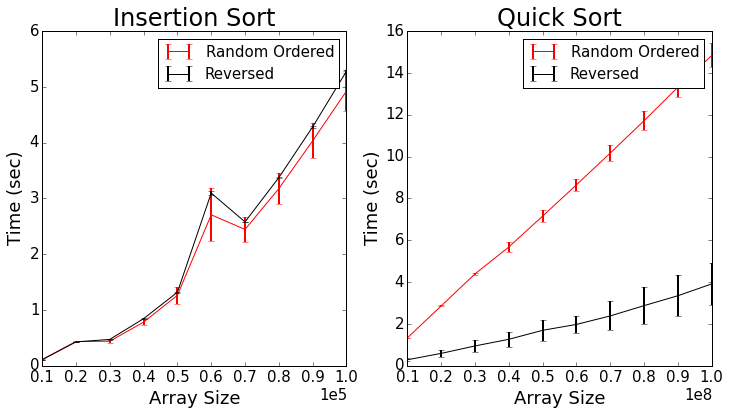

In [100]:
## Create two subplots summarizing results for each type of search tests
# Alias for data names, for easier referencing in plot
dat1 = insert_rnd_dat
dat2 = insert_rev_dat
dat3 = quick_rnd_dat
dat4 = quick_rev_dat

pyplot.figure(figsize = (12,6))
# Subplot 1 -> Insertion sort results
pyplot.subplot(1,2,1)

x1 = dat1[0]
m1 = mean(dat1[1:,:]/1000, axis=0)
s1 = std(dat1[1:,:]/1000, axis=0)

x2 = dat2[0]
m2 = mean(dat2[1:,:]/1000, axis=0)
s2 = std(dat2[1:,:]/1000, axis=0)

h1 = pyplot.errorbar(x1, m1, yerr=s1,elinewidth=2,color='red') # Plot lines
h2 = pyplot.errorbar(x2, m2, yerr=s2,elinewidth=2,color='black') # Plot lines

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
xlabel('Array Size',size=18)
ylabel('Time (sec)',size=18)
legend([h1,h2], ['Random Ordered','Reversed'],fontsize=15)
title('Insertion Sort',size=24)

# Subplot 2 -> Quick sort results
pyplot.subplot(1,2,2)

x1 = dat3[0]
m1 = mean(dat3[1:,:]/1000, axis=0)
s1 = std(dat3[1:,:]/1000, axis=0)

x2 = dat4[0]
m2 = mean(dat4[1:,:]/1000, axis=0)
s2 = std(dat4[1:,:]/1000, axis=0)

h1 = pyplot.errorbar(x1, m1, yerr=s1,elinewidth=2,color='red') # Plot lines
h2 = pyplot.errorbar(x2, m2, yerr=s2,elinewidth=2,color='black') # Plot lines

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
xlabel('Array Size',size=18)
ylabel('Time (sec)',size=18)
legend([h1,h2], ['Random Ordered','Reversed'],fontsize=15)
title('Quick Sort',size=24)

rc('ytick',labelsize=15)
rc('xtick',labelsize=15)

In [101]:
savefig('A3_sort_tests.png')